In [ ]:
Apple_cost = 100
current_tax = 0.1
peacies = 2
total_cost = Apple_cost * (1 + current_tax) * peacies
print("total_cost:", total_cost)


class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    # 順伝播(行き)：ただの掛け算
    def forward(self, x, y):
        self.x = x  # 逆伝播のために覚えておく！
        self.y = y  # 逆伝播のために覚えておく！
        out = x * y
        return out

    # 逆伝播(帰り)：ひっくり返して掛ける
    def backward(self, dout):
        # dout は「上流から流れてきた微分」(さっきの例だと 1.1)
        dx = dout * self.y  # xの勾配には y を掛ける
        dy = dout * self.x  # yの勾配には x を掛ける

        return dx, dy


# 1. レイヤを作る
mul_apple_layer = MulLayer()  # リンゴ * 個数
mul_tax_layer = MulLayer()  # (リンゴ*個数) * 消費税

# 2. 順伝播(買い物をする)
apple = 100
apple_num = 2
tax = 1.1

# 最初の計算: 100 * 2 = 200
apple_price = mul_apple_layer.forward(apple, apple_num)
# 次の計算: 200 * 1.1 = 220
price = mul_tax_layer.forward(apple_price, tax)

print(f"支払金額: {price}")

# 3. 逆伝播(犯人探し)
d_price = 1  # スタートの信号は常に 1
d_apple_price, d_tax = mul_tax_layer.backward(d_price)
d_apple, d_apple_num = mul_apple_layer.backward(d_apple_price)

print(f"リンゴの値段の勾配: {d_apple}")
print(f"リンゴの個数の勾配: {d_apple_num}")
print(f"消費税の勾配: {d_tax}")

total_cost: 220.00000000000003
支払金額: 220.00000000000003
リンゴの値段の勾配: 2.2
リンゴの個数の勾配: 110.00000000000001
消費税の勾配: 200


In [3]:
class AddLayer:
    def __init__(self):
        pass  # 何も覚える必要なし

    def forward(self, x, y):
        return x + y

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy


# レイヤの準備
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# --- 1. 順伝播 (Forward) ---
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# リンゴの値段
apple_price = mul_apple_layer.forward(apple, apple_num)  # 200
# ミカンの値段
orange_price = mul_orange_layer.forward(orange, orange_num)  # 450
# 合算
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # 650
# 消費税込み
price = mul_tax_layer.forward(all_price, tax)  # 715

print(f"支払総額: {price}")

# --- 2. 逆伝播 (Backward) ---
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # 1.1 と 650
dapple_price, dorange_price = add_apple_orange_layer.backward(
    dall_price
)  # そのまま流す
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # ？？？
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(f"ミカンの値段の勾配(dorange): {dorange}")

支払総額: 715.0000000000001
ミカンの値段の勾配(dorange): 3.3000000000000003


In [4]:
# class SFC_Polymath_2026(UniversityStudent):
#     def __init__(self):
#         # 1. Computer Science (The Backbone)
#         self.cs_foundation = {
#             "Algorithms": "Master",
#             "Philosophy": "Absorb",
#             "Architecture": "Build",
#         }
#         # 2. Mathematics (The Engine)
#         self.math_engine = {
#             "Matrix": "Visualize",
#             "Calculus": "Derive",
#             "Prob_Stats": "Intuition",
#         }

#         # 3. Artificial Intelligence (The Brain)
#         self.ai_core = [
#             "Deep Learning (Scratch)",
#             "Machine Learning (Scikit-Learn)",
#             "Reinforcement Learning",
#         ]

#         # 4. Large Language Models (The Soul)
#         self.llm_capability = {
#             "Architecture": "Transformer",
#             "Application": "RAG & Agents",
#             "Creation": "Fine-tuning",
#         }

#         # 5. World Creation (The Stage)
#         self.simulation = "Unity ML-Agents (Simulate the World)"

#     def run_year_2025(self):

#         while True:
#             try:
#                 knowledge = self.read_all_books(library_path="./My_Weaponry")
#                 self.connect_dots(math=self.math_engine, code=self.cs_foundation)
#                 project = self.create_polaris(
#                     ai=self.ai_core, llm=self.llm_capability, sim=self.simulation
#                 )
#                 print(f"World Changed: {project}")
#             except BurnOutError:
#                 self.sleep(8)
#                 self.restart()

In [5]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy


apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)


class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

220.00000000000003


In [6]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

print(price)

dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


In [7]:
# 5.5 活性化関数レイヤの実装
##5.5.1 ReLUレイヤ
import numpy as np


class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = x <= 0
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

mask = x <= 0
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


In [8]:
##5.5.2 Sigmoidレイヤ
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

In [9]:
# 5.6 Affine / Softmaxレイヤ
# 5.6.1 Affineレイヤ

X = np.random.rand(2)
W = np.random.rand(2, 3)
B = np.random.rand(3)

X.shape
W.shape
B.shape

Y = np.dot(X, W) + B

X_dot_W = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([1, 2, 3])

print(X_dot_W)

print(X_dot_W + B)

dY = np.array([[1, 2, 3], [4, 5, 6]])
print(dY)

dB = np.sum(dY, axis=0)
print(dB)

[[1 2 3]
 [4 5 6]]
[[2 4 6]
 [5 7 9]]
[[1 2 3]
 [4 5 6]]
[5 7 9]


In [ ]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):

        self.x = x
        out = np.dot(x, self.W) + self.b
        return out

    def backward(self, dout):
        # パズルタイム開始

        # dx(入力への勾配)を作るには、Wをひっくり返して(T)掛ける
        dx = np.dot(dout, self.W.T)

        # dW(重みへの勾配)を作るには、xをひっくり返して(T)掛ける
        self.dW = np.dot(self.x.T, dout)

        # db(バイアスへの勾配)は、縦方向に合計する(ここは丸暗記でいい)
        self.db = np.sum(dout, axis=0)

        return dx

In [11]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx

In [ ]:
import sys, os

# 親ディレクトリのファイルを読み込めるようにパスを通す。
# 'deep-learning-from-scratch' フォルダの階層構造に依存した記述だ。
sys.path.append(os.path.join(os.pardir, "deep-learning-from-scratch"))

import numpy as np

# 著者が用意したカスタムレイヤ(部品)をインポート。
# ここに Affine, Relu, SoftmaxWithLoss の実装が隠蔽されている。
from common.layers import *

# 数値微分用関数(デバッグや比較検証用)
from common.gradient import numerical_gradient

# 順序付き辞書。Architectが言った通り、レイヤの順番保持に必須だ。
from collections import OrderedDict


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
        print(f"WI.shape = {self.params["W1"].shape}")
        print(self.params["b1"].shape)
        print(self.params["W2"].shape)
        print(self.params["b2"].shape)

        print(self.params["W1"])
        print(self.params["b1"])
        print(self.params["W2"])
        print(self.params["b2"])

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers["Affine1"] = Affine(self.params["W1"], self.params["b1"])
        self.layers["Relu1"] = Relu()
        self.layers["Affine2"] = Affine(self.params["W2"], self.params["b2"])

        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        # 修正箇所: layers (複数形) ではなく layer (単数形) で回す
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    # x: 入力データ, t: 教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1:
            t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])

        return grads

    def gradient(self, x, t):
        # 1. forward
        self.loss(x, t)

        # 2. backward
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 3. 設定
        grads = {}
        grads["W1"] = self.layers["Affine1"].dW
        grads["b1"] = self.layers["Affine1"].db
        grads["W2"] = self.layers["Affine2"].dW
        grads["b2"] = self.layers["Affine2"].db

        return grads

In [ ]:
# -------------------------------------------------------
# 以下、動作確認用コード(Gradient Check)
# -------------------------------------------------------

if __name__ == "__main__":
    # 1. データの準備(ダミーデータ)
    # 入力: 3個のデータ、それぞれのサイズは784 (MNISTと同じ)
    x_batch = np.random.rand(3, 784)
    # 正解: 3個のデータ、それぞれの正解ラベル(0~9のランダムな数字)
    t_batch = np.random.randint(0, 10, 3)

    # 2. ネットワークの生成(インスタンス化)
    network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

    print("-------------------------------------------------------")
    print("Calculated Gradients... (This may take a few seconds)")

    # 3. 勾配の計算
    # (A) 数値微分(前章のやり方：確実だが遅い)
    grad_numerical = network.numerical_gradient(x_batch, t_batch)

    # (B) 誤差逆伝播法(今回のやり方：高速)
    grad_backprop = network.gradient(x_batch, t_batch)

    # 4. 誤差の検証
    # 各重みパラメータについて、(A)と(B)の差の平均を計算する
    print("\n[ Gradient Check Result ]")

    total_diff = 0
    count = 0

    for key in grad_numerical.keys():
        # 数値微分と逆伝播法の差分をとる
        diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
        print(f"{key}: {diff:.10f}")  # 小数点以下10桁まで表示

        total_diff += diff
        count += 1

    print("-------------------------------------------------------")
    if total_diff / count < 1e-5:
        print("✅ Success! 誤差逆伝播法の実装は正確です。")
        print("   (数値微分との誤差が極めて小さいことが確認できました)")
    else:
        print("❌ Warning! 誤差が大きすぎます。実装を見直してください。")

WI.shape = (784, 50)
(50,)
(50, 10)
(10,)
[[-0.00620743  0.00993943 -0.01080228 ... -0.01929413 -0.01290581
   0.00362745]
 [ 0.00178094 -0.02533698 -0.00347192 ...  0.00751598  0.02319368
   0.00875932]
 [-0.00484232 -0.00806059  0.02116629 ... -0.00067128  0.00412246
   0.00418618]
 ...
 [-0.00187789  0.01189441  0.00820527 ... -0.00252333 -0.01069286
   0.01449054]
 [ 0.00799067 -0.00106388 -0.01523776 ... -0.01258832 -0.00753093
  -0.00234407]
 [ 0.01321599 -0.00240191  0.00560029 ...  0.00077052 -0.00973336
   0.02315744]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[[-4.61553316e-03 -9.26057416e-03  4.75814392e-03 -6.88999408e-03
  -1.46587583e-02  1.21653057e-02  6.52179525e-03 -1.55299892e-02
  -1.10770955e-02  8.32102100e-03]
 [ 6.52100741e-03 -7.11140047e-03  8.16208890e-05  6.64565297e-03
   3.28986042e-03 -2.35491529e-02  2.38045502e-02 -1.55480690e-02
   5.26810867

In [14]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        print(f"[Forward] x={x}, y={y}, out={out}")

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        print(f"[Backward] dout={dout}, dx={dx},dy={dy}")

        return dx, dy

In [15]:
apple = 100
appple_num = 3
tax = 1.1

# レイヤの作成
mul_applelayer = MulLayer()
mul_tax_layer = MulLayer()

# Forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(f"最終価格: {price}")

# Backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, apple_num = mul_apple_layer.backward(dapple_price)

print(f"dApple: {dapple}, dApple_num: {dapple_num}, dTax: {dtax}")

[Forward] x=200, y=1.1, out=220.00000000000003
最終価格: 220.00000000000003
[Backward] dout=1, dx=1.1,dy=200
dApple: 2.2, dApple_num: 110.00000000000001, dTax: 200


In [2]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------- -------------------------- 2.6/8.0 MB 15.3 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.0 MB 13.3 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 10.4 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/8.0 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 7.6 MB/s  0:00:01
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   - -------------------------------------- 1.0/36.3 MB 5.8 MB/s eta 0:00:07
   -- ------------------------------------- 2.4/36.3 MB 6.3 MB/s eta 0:00:06
   ----- ---------------------------------- 5.0/36.3 MB 8.0 MB/s eta 0:00:04
   ---------- ----------------------------- 9.2/36.3 MB 11.0 MB/s eta 0:00:03
   --------------- ------------------------ 14.4/36.3 MB 13.9 MB/s eta 0:00:02
   --------------

digits = {'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)), 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5'

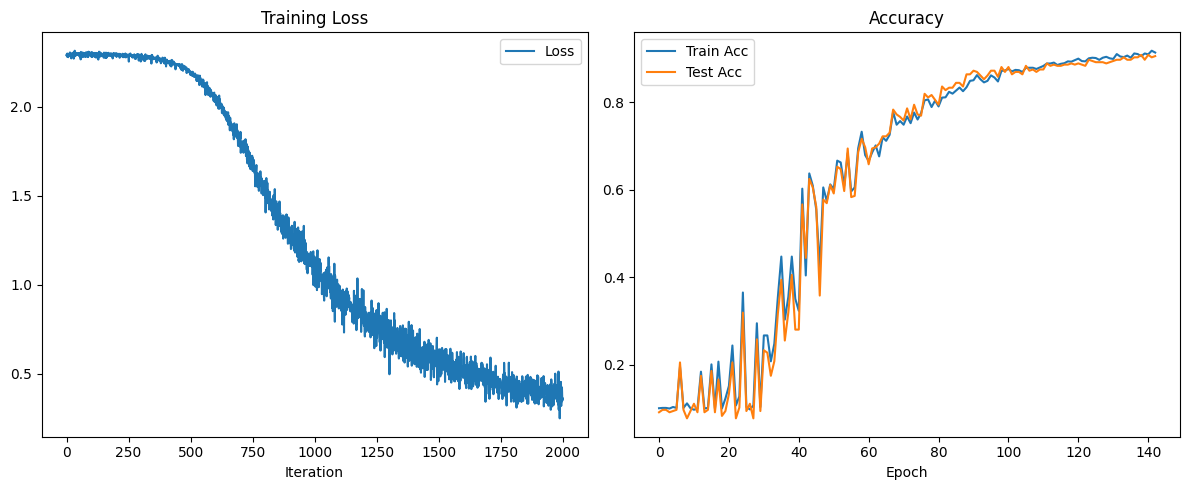

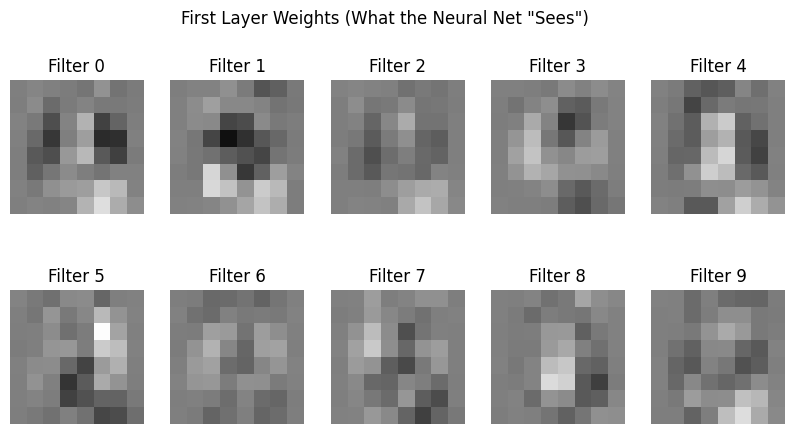

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# === 0. Data Preparation (素材の下ごしらえ) ===
print("0. Data Preparation (素材の下ごしらえ) ")
# ------------------------------------------------------------------
# 【1. データの召喚】
# ------------------------------------------------------------------
# [意味] 手書き数字データセット「digits」をメモリ上に読み込む。
# [詳細] 本来はMNIST(7万枚)を使うが、ここでは軽量版(1797枚, 8x8ピクセル)を使用。
#        変数digitsは辞書型のような構造で、画像データ(.data)や正解ラベル(.target)が詰まっている。
digits = load_digits()
print(f"digits = {digits}")

# ------------------------------------------------------------------
# 【2. 特徴量の抽出 (Input X)】
# ------------------------------------------------------------------
# [意味] 画像データ本体だけを取り出し、変数Xに格納する。
# [形状] X.shape は (1797, 64) になる。
# [理由] 画像は縦8×横8=64ピクセルだが、AIに入力するためには「1列の数値の列」にする必要がある。
#        すでにscikit-learn側で 8x8 -> 64 に平坦化(Flatten)されている。
X = digits.data
print(f"X = {X}")

# ------------------------------------------------------------------
# 【3. 正規化 (Min-Max Normalization)】
# ------------------------------------------------------------------
# [意味] データの値を 0.0 〜 1.0 の範囲に圧縮する。
# [数式] x_new = (x - x_min) / (x_max - x_min)
# [現状] 元のデータは「0(黒) 〜 16(白)」の整数値が入っている。
# [理由] ★超重要★
#        1. 「勾配爆発」の防止: 入力値が大きいと、計算結果が巨大になりすぎ、学習が不安定になる。
#        2. 学習速度の向上: 0〜1の範囲の方が、重みの修正（微分）がスムーズに進む。
#        Deep Learningでは「入力は小さく、中心を0付近に」が鉄則である。
X = (X - X.min()) / (X.max() - X.min())
print(f"X = {X}")

# ------------------------------------------------------------------
# 【4. 正解ラベルの抽出 (Label y)】
# ------------------------------------------------------------------
# [意味] 「この画像は『3』です」という正解データ(整数)を取り出す。
# [形状] y.shape は (1797,) の1次元配列。中身は [0, 1, 2, ..., 9] のような数字。
y = digits.target
print(f"y = {y}")

# ------------------------------------------------------------------
# 【5. One-hot表現への変換準備】
# ------------------------------------------------------------------
# [意味] 分類クラス数（今回は0〜9なので10種類）。
num_classes = 10

# [意味] 全てが「0」で埋められた箱を用意する。
# [形状] T.shape は (1797, 10)。つまり「データ数 × クラス数」の行列。
# [理由] AIの出力層は10個のニューロン（確率）で構成されるため、正解データも同じ形にする必要がある。
#        最初は真っ白なキャンバス（全部0）を作っておく。
T = np.zeros((y.size, num_classes))
print(f"T = {T}")

# ------------------------------------------------------------------
# 【6. One-hot Encoding の実行】
# ------------------------------------------------------------------
# [意味] 正解の場所だけを「1」にする（フラグを立てる）。
# [動作] 例えば i番目のデータの正解 y[i] が「3」だった場合：
#        T[i] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  (初期状態)
#        ↓
#        T[i, 3] = 1 を実行
#        ↓
#        T[i] = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]  (完了)
# [理由] 機械学習において「数字の大きさ」に意味を持たせないため。
#        「数字の3」と「数字の5」は、カテゴリーが違うだけであり、大きさが近いわけではない。
#        ベクトル化することで、各数字を「独立したカテゴリー」として扱えるようになる。
for i in range(y.size):
    T[i, y[i]] = 1

# ------------------------------------------------------------------
# 【7. 訓練データとテストデータの分割 (Splitting)】
# ------------------------------------------------------------------
# [意味] 全データを「勉強用(Train)」と「試験用(Test)」に切り分ける。
# [引数]
#   - test_size=0.2: 全体の20%を試験用(Test)に残し、80%を勉強用(Train)にする。
#   - random_state=42: 乱数の種。これを指定すると、毎回同じ分け方になる（再現性の確保）。
# [戻り値]
#   - X_train: 勉強用の画像データ (約1437枚)
#   - X_test : 試験用の画像データ (約360枚)  <- カンニング防止のため学習には使わない！
#   - t_train: 勉強用の正解ラベル
#   - t_test : 試験用の正解ラベル
# [理由] 「過学習(Overfitting)」を防ぐため。
#        練習問題（Train）を丸暗記して100点を取れても、初見の問題（Test）が解けなければ意味がない。
#        AIの真の実力（汎化性能）を測るために、テストデータは聖域として隔離する。
X_train, X_test, t_train, t_test = train_test_split(
    X, T, test_size=0.2, random_state=42
)

# === 1. The Tools (道具たち：活性化関数と損失関数) ===
print("1. The Tools (道具たち：活性化関数と損失関数)")


# ------------------------------------------------------------------
# 【1. Sigmoid関数 (The Switch)】
# ------------------------------------------------------------------
# [意味] 入力値を 0.0 〜 1.0 の間の滑らかな曲線に変換する。
# [数式] y = 1 / (1 + e^-x)
# [役割] 「非線形性」を与える。これがないと、層をいくら重ねても「ただの1回の掛け算」と同じになってしまう。
# [動作]
#   - x が 0 のとき -> 0.5
#   - x が超大きいとき -> 1.0 に近づく
#   - x が超小さい(マイナス)とき -> 0.0 に近づく
def sigmoid(x):
    # np.exp(-x) は eの-x乗。
    return 1 / (1 + np.exp(-x))


# ------------------------------------------------------------------
# 【2. Softmax関数 (The Judge)】
# ------------------------------------------------------------------
# [意味] 出力層の数値を「確率」に変換する関数。
# [役割] ニューラルネットが出した「スコア（例: 3.5, -1.2, 0.1）」を、
#        「合計すると1.0(100%)になる確率（例: 0.9, 0.05, 0.05）」に正規化する。
def softmax(x):
    # [防御策] オーバーフロー対策 (これが超重要！)
    # 指数関数 exp(x) は、xが1000とかになると「無限大(inf)」になり計算が爆発する。
    # それを防ぐため、入力の中の最大値(c)を引く。
    # 数学的に exp(x - c) / sum(exp(x - c)) は元の計算結果と同じになる性質を利用している。

    # --- バッチ処理対応 (データが複数まとめて来た場合) ---
    if x.ndim == 2:
        # xの形状は (データ数N, クラス数C) だが、
        # 計算の都合上（ブロードキャストをしやすくするため）、転置して (C, N) にする。
        x = x.T

        # 最大値を引く (オーバーフロー対策)
        x = x - np.max(x, axis=0)

        # 確率の計算: exp(x) / 全体の合計
        y = np.exp(x) / np.sum(np.exp(x), axis=0)

        # 計算終わったので、元の形 (N, C) に戻して返す
        return y.T

    # --- データが1つだけの場合 ---
    x = x - np.max(x)  # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))


# ------------------------------------------------------------------
# 【3. Cross Entropy Error (The Critic)】
# ------------------------------------------------------------------
# [意味] 交差エントロピー誤差。AIの出した「確率」と「正解」のズレを測る。
# [数式] L = - Σ (正解ラベル * log(予測確率))
# [役割]
#   - AIが正解を当てた(確率1.0)なら -> 誤差は 0
#   - AIが正解を外した(確率0.0)なら -> 誤差は 無限大
#   この「誤差」を最小化するように学習が進む。
def cross_entropy_error(y, t):

    # [データ整形の儀式]
    # データが1つだけ(1次元)の場合でも、バッチ処理と同じ(2次元)形に無理やり直す。
    # こうすることで、後のコードを「複数データ用」に統一できる。
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # [One-hotからの復元]
    # もし正解データ t が One-hot形式 ([0, 0, 1, 0...]) なら、
    # 正解のインデックス「2」という形に戻す。計算しやすくするため。
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]

    # [核心部の計算]
    # np.arange(batch_size) -> [0, 1, 2, ... バッチサイズ-1]
    # t -> [2, 0, 5, ...] (各データの正解ラベル)
    #
    # y[np.arange(batch_size), t] という書き方は「ファンシーインデックス」と呼ばれる技。
    # これで「各データの、正解ラベルに対応する確率だけ」を抜き出している。
    # 例: 0番目のデータは正解が「2」なので、y[0, 2] (確率0.8) を抜き出す。
    #
    # + 1e-7 (0.0000001) を足す理由:
    #   log(0) は「マイナス無限大(-inf)」になり計算が壊れる。
    #   微小な値を足すことで、log(0)になるのを防ぐ安全装置。
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


# === 2. The Blueprint (2層ニューラルネットワークの設計図) ===
class TwoLayerNet:

    # ------------------------------------------------------------------
    # 【1. 初期化 (The Genesis)】
    # ------------------------------------------------------------------
    # [引数]
    #   input_size=64  : 入力画像の画素数 (8x8)
    #   hidden_size=50 : 隠れ層のニューロン数 (多すぎると重い、少なすぎるとバカになる)
    #   output_size=10 : 正解の種類の数 (0~9の数字なので10個)
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):

        # [重みの保管庫]
        # パラメータ(W1, b1, W2, b2)を辞書で管理する。
        self.params = {}

        # --- 1層目のパラメータ (Input -> Hidden) ---
        # W1: 重み行列。形状は (64, 50)。
        # np.random.randn: 平均0、分散1のガウス分布でランダムな数字を作る。
        # weight_init_std(0.01): ランダムな値を0.01倍して小さくする。
        # [理由] 初期値が大きすぎると、学習が進まなくなる(勾配消失)ため、小さな値から始める。
        #        また、全て0にしてはいけない(対称性の破壊が必要)。
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)

        # b1: バイアス。形状は (50,)。最初は0でいい。
        self.params["b1"] = np.zeros(hidden_size)

        # --- 2層目のパラメータ (Hidden -> Output) ---
        # W2: 重み行列。形状は (50, 10)。
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)

        # b2: バイアス。形状は (10,)。
        self.params["b2"] = np.zeros(output_size)

    # ------------------------------------------------------------------
    # 【2. 推論 / 順伝播 (Forward Propagation)】
    # ------------------------------------------------------------------
    # [役割] 画像データxを受け取り、確率yを出力する。
    # [数式] Y = Softmax( Sigmoid(X・W1 + b1)・W2 + b2 )
    def predict(self, x):
        # パラメータを取り出す
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        # [第1層: Affine変換]
        # 行列積: (Batch, 64) ・ (64, 50) -> (Batch, 50)
        # 意味: 64個のピクセル情報を混ぜ合わせて、50個の特徴量に変換する。
        a1 = np.dot(x, W1) + b1

        # [第1層: 活性化]
        # 意味: 数値を 0.0~1.0 に押し込め、非線形な表現力を持たせる。
        z1 = sigmoid(a1)

        # [第2層: Affine変換]
        # 行列積: (Batch, 50) ・ (50, 10) -> (Batch, 10)
        # 意味: 50個の特徴量から、最終的な10個の数字スコアを計算する。
        a2 = np.dot(z1, W2) + b2

        # [出力層: 確率化]
        # 意味: スコアを確率(合計100%)に変換する。
        y = softmax(a2)

        return y

    # ------------------------------------------------------------------
    # 【3. 損失計算 (The Critique)】
    # ------------------------------------------------------------------
    # [役割] 「今の推論y」と「正解t」がどれくらいズレているか(Loss)を計算する。
    def loss(self, x, t):
        # まず推論させる
        y = self.predict(x)

        # ズレを計算して返す
        return cross_entropy_error(y, t)

    # ------------------------------------------------------------------
    # 【4. 精度計算 (The Scoreboard)】
    # ------------------------------------------------------------------
    # [役割] テスト勉強の採点。「正解率(%)」を計算する。学習には使わないが、人間が安心するために必要。
    def accuracy(self, x, t):
        # 推論させる
        y = self.predict(x)

        # [確率 -> 決定]
        # argmax: 確率が一番高いインデックス(数字)を選ぶ。
        # 例: y=[0.1, 0.8, 0.1] -> 1 ("これは1だ！")
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)  # One-hotを数字に戻す

        # 正解数 / 全データ数
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # ------------------------------------------------------------------
    # 【5. 勾配計算 (The Evolution)】
    # ------------------------------------------------------------------
    # [役割] Lossを0にするために、「パラメータをどの方向に、どれくらい動かせばいいか(勾配)」を計算する。
    # [仕組み]
    #   1. Forward: 最後まで計算して、途中の値(z1など)を記録する。
    #   2. Backward: 最後尾から「誤差」を逆流させ、微分(連鎖律)を適用していく。
    def gradient(self, x, t):
        # --- 1. Forward (順伝播) ---
        # 逆伝播の計算には「順伝播の時の入力値(z1やx)」が必要になるため、もう一度計算する。
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)  # ★重要: これを後で使う
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # --- 2. Backward (逆伝播) スタート ---
        batch_size = x.shape[0]  # バッチサイズ (例: 100)

        # [Step 1: 出力層の勾配]
        # Lossを微分すると、(予測y - 正解t) という驚くほど単純な式になる。
        # バッチサイズで割るのは、データ1個あたりの平均誤差にするため。
        dy = (y - t) / batch_size

        # パラメータの勾配を入れる箱
        grads = {}

        # [Step 2: 第2層の勾配 (Affine2)]
        # 数式: dL/dW2 = z1^T ・ dy
        # 形状チェック: (50, 100) ・ (100, 10) -> (50, 10) = W2と同じ形！
        # 意味: 「入力信号(z1)が強かった場所」×「誤差(dy)が大きかった場所」は、犯人(W2)の責任が大きい。
        grads["W2"] = np.dot(z1.T, dy)
        grads["b2"] = np.sum(dy, axis=0)  # バイアスは単純な足し合わせ

        # [Step 3: 逆流 (Hidden層へ)]
        # 誤差dyを、W2を介して逆流させる。
        # 数式: dz1 = dy ・ W2^T
        dz1 = np.dot(dy, W2.T)

        # [Step 4: 活性化関数の逆伝播 (Sigmoid)]
        # Sigmoidの微分は y(1-y) という公式がある。
        # 順伝播の出力 z1 を使って計算できる。
        # 意味: 元の信号が0や1に近かった(飽和していた)場所は、勾配を弱める。
        da1 = dz1 * (1.0 - z1) * z1

        # [Step 5: 第1層の勾配 (Affine1)]
        # 数式: dL/dW1 = x^T ・ da1
        # 形状チェック: (64, 100) ・ (100, 50) -> (64, 50) = W1と同じ形！
        grads["W1"] = np.dot(x.T, da1)
        grads["b1"] = np.sum(da1, axis=0)

        # 全パラメータの「修正すべき方向」が入った辞書を返す
        return grads


# === 3. Construction (学習の実行) ===

# ------------------------------------------------------------------
# 【1. 実体の生成 (The Incarnation)】
# ------------------------------------------------------------------
# [意味] 設計図(クラス)から、実際にメモリ上にAIの実体(インスタンス)を生み出す。
# [引数]
#   input_size=64  : 入力は8x8=64次元。
#   hidden_size=50 : 隠れ層は50個のニューロン。
#   output_size=10 : 出力は0~9の10種類。
network = TwoLayerNet(input_size=64, hidden_size=50, output_size=10)

# ------------------------------------------------------------------
# 【2. ハイパーパラメータの設定 (The Rules of Engagement)】
# ------------------------------------------------------------------
# [意味] 人間が決めるべき「学習の設定値」。AIはこれを自分では決められない。

# [反復回数] 勾配計算と更新を何回繰り返すか。
# 多すぎると時間がかかり、少なすぎると賢くならない。
iters_num = 2000

# [訓練データ数] 全データ数(約1437枚)。
train_size = X_train.shape[0]

# [バッチサイズ] 1回に何枚の画像をまとめて勉強するか。
# 理由: 1枚ずつだと「外れ値」に振り回される。全データ一気だと計算が重すぎる。
#       100枚くらいの平均を見るのが丁度いい（ミニバッチ学習）。
batch_size = 100

# [学習率] 一回の更新で、どれくらい大きく値を書き換えるか。
# 0.1 は「慎重かつ大胆に」という標準的な値。
# 大きすぎ(10.0) -> 発散して死ぬ。 小さすぎ(0.0001) -> 日が暮れても終わらない。
learning_rate = 0.1

# ------------------------------------------------------------------
# 【3. 記録用リスト (The Logbook)】
# ------------------------------------------------------------------
# [意味] 学習の経過（Lossや正解率）を保存しておく箱。あとでグラフにするため。
train_loss_list = []
train_acc_list = []
test_acc_list = []

# ------------------------------------------------------------------
# 【4. 1エポックの定義 (The Epoch)】
# ------------------------------------------------------------------
# [意味] 「1エポック」＝「全データを一通り見終わる」のに必要な回数。
# 計算: 1437枚のデータ / バッチ100枚 ≒ 14回。
# つまり、14回ループを回せば、確率的に全データを1回見たことになる。
iter_per_epoch = max(int(train_size / batch_size), 1)


# ==================================================================
# 【5. 学習ループ開始 (The Grind)】
# ==================================================================
# ここからAIの修行が始まる。2000回の反復練習。
for i in range(iters_num):

    # --------------------------------------------------------------
    # [Step 1: ミニバッチの選定 (Stochastic Sampling)]
    # --------------------------------------------------------------
    # [意味] 訓練データからランダムに100個選ぶ。
    # np.random.choice(1437, 100): 0~1436の中からランダムに100個の数字を選ぶ。
    batch_mask = np.random.choice(train_size, batch_size)

    # 選ばれた番号のデータ(画像と正解)を取り出す。
    x_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]

    # --------------------------------------------------------------
    # [Step 2: 勾配の計算 (Backpropagation)]
    # --------------------------------------------------------------
    # [意味] ★ここが計算のハイライト★
    # 「今の重みだと、どれくらい間違えているか？」
    # 「誤差を減らすには、各パラメータをプラス・マイナスどっちに動かせばいいか？」
    # を計算し、全てのパラメータの修正案(grad)を受け取る。
    grad = network.gradient(x_batch, t_batch)

    # --------------------------------------------------------------
    # [Step 3: パラメータの更新 (Gradient Descent)]
    # --------------------------------------------------------------
    # [意味] 計算した勾配(grad)に従って、実際に重み(params)を書き換える。
    # 数式: W = W - (学習率 * 勾配)
    # 理由: 勾配は「誤差が増える方向」を指している。だから「マイナス」して逆方向へ進む。
    #       これでAIは少しだけ賢くなる（誤差が減る場所へ移動する）。
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    # --------------------------------------------------------------
    # [Step 4: 経過観察 (Recording)]
    # --------------------------------------------------------------
    # 更新後のパラメータで、もう一度Lossを計算して記録する。
    # (グラフで右肩下がりになっているか確認するため)
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # --------------------------------------------------------------
    # [Step 5: 定期テスト (Validation)]
    # --------------------------------------------------------------
    # [意味] 毎回テストすると重いので、1エポックごと(約14回に1回)だけテストする。
    if i % iter_per_epoch == 0:
        # 訓練データでの正解率（練習問題の点数）
        train_acc = network.accuracy(X_train, t_train)
        # テストデータでの正解率（本番の点数）
        test_acc = network.accuracy(X_test, t_test)

        # 記録する
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        # ログを表示（生きてるか確認するため）
        # print(f"iter {i}: train acc {train_acc:.4f}, test acc {test_acc:.4f}")

# === 4. Visual Inspection (学習結果の可視化：AIの脳内を覗く) ===

# ------------------------------------------------------------------
# 【1. 学習曲線の描画 (The Dashboard)】
# ------------------------------------------------------------------
# [意味] グラフを描くためのキャンバスを用意する。
# figsize=(12, 5): 横長(12インチ x 5インチ)の紙を用意。
# 1, 2: 「1行2列」のレイアウト。つまり左右に2つのグラフを並べる。
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- 左側のグラフ: 損失(Loss)の推移 ---
# [意味] 2000回の反復の中で、「誤差」がどう減っていったかを描画。
# [判定基準]
#   - 綺麗な右肩下がり -> 成功。正常に学習している。
#   - 全く下がらない -> 失敗。学習率が小さすぎるか、コードが間違っている。
#   - 途中で増える -> 失敗。学習率が大きすぎて発散している。
axes[0].plot(train_loss_list, label="Loss")
axes[0].set_title("Training Loss")
axes[0].set_xlabel("Iteration")
axes[0].legend()  # 凡例を表示

# --- 右側のグラフ: 正解率(Accuracy)の推移 ---
# [意味] 「訓練データ(青)」と「テストデータ(オレンジ)」の成績を同時にプロットする。
# [判定基準] ★ここが最重要★
#   - 両方とも右肩上がりで、ほぼ重なっている -> 成功。
#   - Trainは100%に近いのに、Testが低いまま -> 「過学習(Overfitting)」。
#     AIは練習問題の答えを丸暗記しただけで、本質を理解していない。
axes[1].plot(train_acc_list, label="Train Acc")
axes[1].plot(test_acc_list, label="Test Acc")
axes[1].set_title("Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].legend()

# [保存] グラフのレイアウトを整えて、画像ファイルとして保存する。
plt.tight_layout()
plt.savefig("vol1_training_results.png")


# ------------------------------------------------------------------
# 【2. 重みの可視化 (The Brain Scan)】
# ------------------------------------------------------------------
# [意味] 学習が終わった「第1層の重み(W1)」を画像として表示してみる。
#        W1は「入力(64画素)」と「隠れ層(50個)」をつなぐ線。
#        つまり、隠れ層のニューロン1つひとつが「画像のどこを見ているか」が分かる。
plt.figure(figsize=(10, 5))

# [色の調整]
# 重みの値はプラス(白)だったりマイナス(黒)だったりする。
# 0を中心に対称に表示するため、絶対値の最大値を取得してスケールを合わせる。
scale = np.abs(network.params["W1"]).max()

# 最初の10個のニューロン(フィルタ)だけを表示してみる
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2行5列のi番目に描画

    # ★ここがミソ★
    # network.params["W1"][:, i] の形状は (64,) という1列の棒。
    # これを .reshape(8, 8) で、元の画像の形に戻す！
    # こうすると、ニューロンが「どんな形」に反応しようとしているかが見える。
    plt.imshow(
        network.params["W1"][:, i].reshape(8, 8),
        cmap=plt.cm.gray,  # グレースケールで表示
        vmin=-scale,  # 最も黒い色
        vmax=scale,  # 最も白い色
    )
    plt.axis("off")  # 軸目盛りは邪魔なので消す
    plt.title(f"Filter {i}")

# 全体のタイトルをつけて保存
plt.suptitle('First Layer Weights (What the Neural Net "Sees")')
plt.savefig("vol1_weights_viz.png")

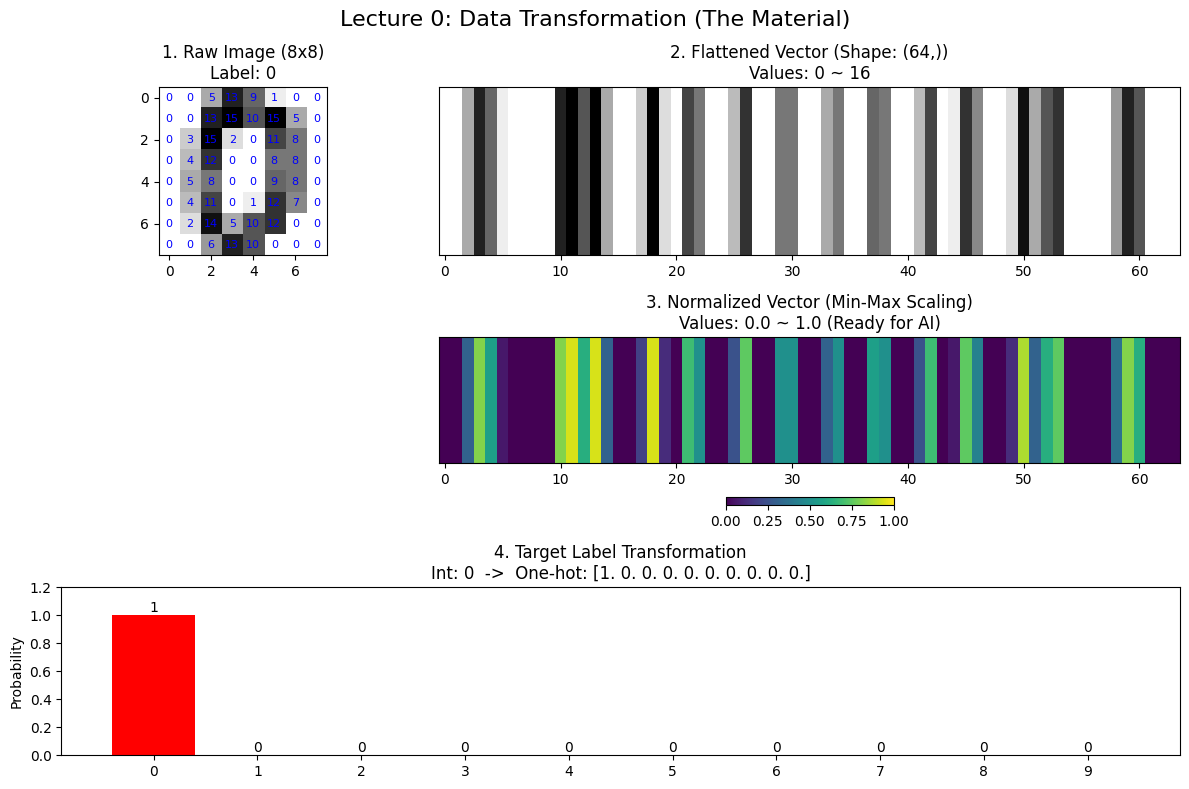

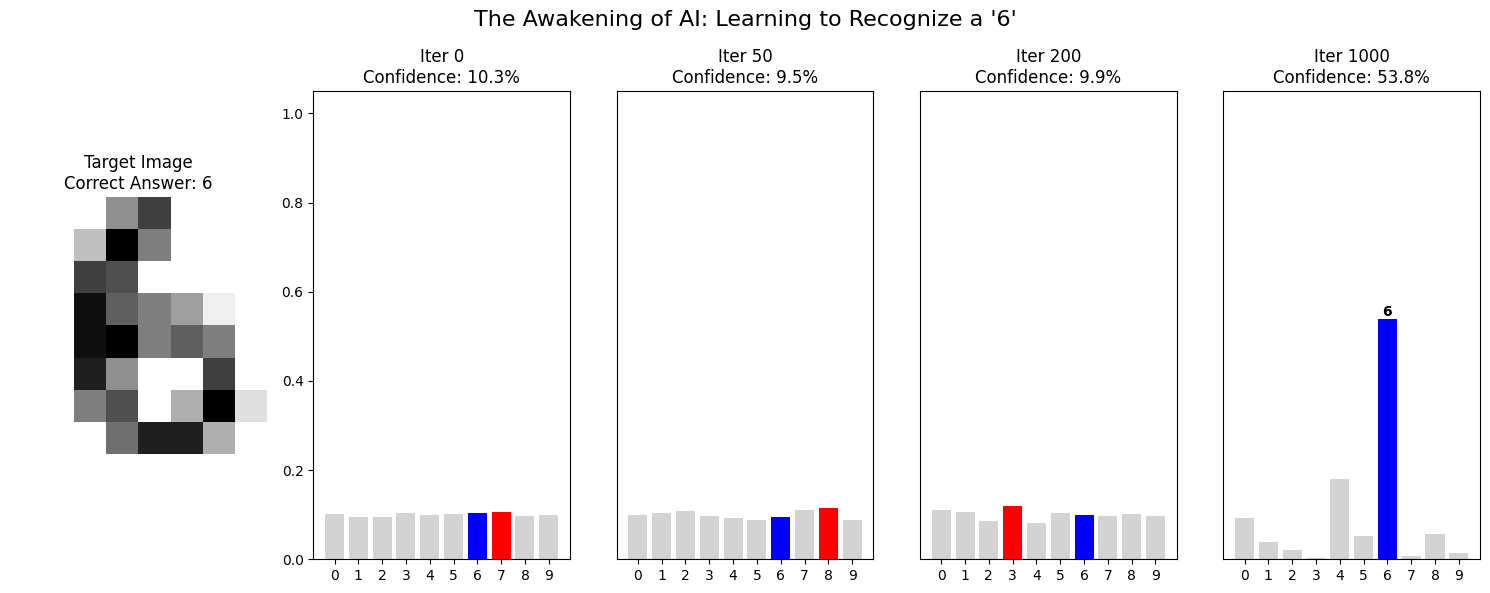

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# === 0. Data Preparation ===
digits = load_digits()
X_raw = digits.data
X = (X_raw - X_raw.min()) / (X_raw.max() - X_raw.min())
y = digits.target

num_classes = 10
T = np.zeros((y.size, num_classes))
for i in range(y.size):
    T[i, y[i]] = 1

X_train, X_test, t_train, t_test = train_test_split(
    X, T, test_size=0.2, random_state=42
)


# === Visualization Function ===
def visualize_data_flow():
    # Pick the first sample from the dataset
    sample_idx = 0
    raw_img = digits.images[sample_idx]  # 8x8 matrix
    raw_vec = digits.data[sample_idx]  # 64 vector (0-16)
    norm_vec = X[sample_idx]  # 64 vector (0.0-1.0)
    label = y[sample_idx]  # int (0)
    one_hot = T[sample_idx]  # one-hot vector

    fig = plt.figure(figsize=(12, 8))
    plt.suptitle("Lecture 0: Data Transformation (The Material)", fontsize=16)

    # 1. Raw Image (Human View)
    ax1 = plt.subplot2grid((3, 3), (0, 0))
    ax1.imshow(raw_img, cmap="gray_r")
    ax1.set_title(f"1. Raw Image (8x8)\nLabel: {label}")
    # Add pixel values text
    for i in range(8):
        for j in range(8):
            text = ax1.text(
                j,
                i,
                int(raw_img[i, j]),
                ha="center",
                va="center",
                color="blue",
                fontsize=8,
            )

    # 2. Flattened Raw Data (Computer View - Step 1)
    ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
    # Reshape for visualization as a bar
    ax2.imshow(raw_vec.reshape(1, -1), cmap="gray_r", aspect="auto")
    ax2.set_title(f"2. Flattened Vector (Shape: {raw_vec.shape})\nValues: 0 ~ 16")
    ax2.set_yticks([])

    # 3. Normalized Data (Computer View - Step 2)
    ax3 = plt.subplot2grid((3, 3), (1, 1), colspan=2)
    im3 = ax3.imshow(
        norm_vec.reshape(1, -1), cmap="viridis", aspect="auto", vmin=0, vmax=1
    )
    ax3.set_title(
        f"3. Normalized Vector (Min-Max Scaling)\nValues: 0.0 ~ 1.0 (Ready for AI)"
    )
    ax3.set_yticks([])
    plt.colorbar(im3, ax=ax3, orientation="horizontal", fraction=0.05, pad=0.2)

    # 4. Label Transformation (One-hot)
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=3)

    # Create a visual representation of One-hot
    bars = ax4.bar(
        range(10), one_hot, color=["red" if x == 1 else "lightgray" for x in one_hot]
    )
    ax4.set_title(
        f"4. Target Label Transformation\nInt: {label}  ->  One-hot: {one_hot}"
    )
    ax4.set_xticks(range(10))
    ax4.set_ylim(0, 1.2)
    ax4.set_ylabel("Probability")

    # Add text above bars
    for i, rect in enumerate(bars):
        height = rect.get_height()
        ax4.text(
            rect.get_x() + rect.get_width() / 2.0,
            height,
            f"{int(height)}",
            ha="center",
            va="bottom",
        )

    plt.tight_layout()
    plt.savefig("data_transformation_viz.png")


visualize_data_flow()


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# === 1. Prepare Data & Model (Reloading for Clean State) ===
digits = load_digits()
X = (digits.data - digits.data.min()) / (digits.data.max() - digits.data.min())
y = digits.target
T = np.zeros((y.size, 10))
for i in range(y.size):
    T[i, y[i]] = 1

X_train, X_test, t_train, t_test = train_test_split(
    X, T, test_size=0.2, random_state=42
)


# Define Functions needed
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        self.params = {}
        self.params["W1"] = 0.01 * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = 0.01 * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y

    def gradient(self, x, t):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        batch_size = x.shape[0]
        dy = (y - t) / batch_size
        grads = {}
        grads["W2"] = np.dot(z1.T, dy)
        grads["b2"] = np.sum(dy, axis=0)
        dz1 = np.dot(dy, W2.T)
        da1 = dz1 * (1.0 - z1) * z1
        grads["W1"] = np.dot(x.T, da1)
        grads["b1"] = np.sum(da1, axis=0)
        return grads


# === 2. Setup "Tracking" Experiment ===
network = TwoLayerNet(input_size=64, hidden_size=50, output_size=10)

# Pick a specific test image to watch (e.g., index 0 of X_test)
# Let's find a '3' or something recognizable.
target_idx = 0
target_img_vec = X_test[target_idx]
target_label_vec = t_test[target_idx]
target_label_int = np.argmax(target_label_vec)

# Checkpoints to capture the brain state
checkpoints = [0, 50, 200, 1000]  # Iterations
history_predictions = []

# Training Parameters
iters_num = 1001
learning_rate = 0.1
batch_size = 100

# === 3. Run Training & Snapshot ===
for i in range(iters_num):
    # Snapshot prediction BEFORE update
    if i in checkpoints:
        # Predict for our target image (needs to be shaped (1, 64) for batch processing logic or handle 1D)
        # Our predict handles 1D but let's reshape to (1, 64) for safety
        pred_prob = network.predict(target_img_vec.reshape(1, -1))[0]
        history_predictions.append((i, pred_prob))

    # Normal Training Step
    batch_mask = np.random.choice(X_train.shape[0], batch_size)
    x_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

# === 4. Visualization (The Evolution) ===
fig = plt.figure(figsize=(15, 6))
plt.suptitle(
    f"The Awakening of AI: Learning to Recognize a '{target_label_int}'", fontsize=16
)

# Show the Image being looked at
ax_img = plt.subplot2grid((1, 5), (0, 0))
ax_img.imshow(target_img_vec.reshape(8, 8), cmap="gray_r")
ax_img.set_title(f"Target Image\nCorrect Answer: {target_label_int}", fontsize=12)
ax_img.axis("off")

# Show predictions at checkpoints
for idx, (iter_count, pred) in enumerate(history_predictions):
    ax = plt.subplot2grid((1, 5), (0, idx + 1))

    # Color logic: Red for wrong bars, Blue for correct bar
    colors = ["blue" if i == target_label_int else "lightgray" for i in range(10)]
    # Highlight the max prediction
    max_p = np.argmax(pred)
    if max_p != target_label_int:
        colors[max_p] = "red"  # Wrong confident guess

    bars = ax.bar(range(10), pred, color=colors)
    ax.set_ylim(0, 1.05)
    ax.set_title(f"Iter {iter_count}\nConfidence: {pred[target_label_int]*100:.1f}%")
    ax.set_xticks(range(10))
    if idx > 0:
        ax.set_yticks([])  # Hide y-axis for cleaner look

    # Add simple labels for high bars
    for i, p in enumerate(pred):
        if p > 0.2:
            ax.text(
                i,
                p,
                f"{int(i)}",
                ha="center",
                va="bottom",
                fontsize=10,
                fontweight="bold",
            )

plt.tight_layout()
plt.savefig("learning_evolution_viz.png")